# Support Vector Machines

In the previous tutorials, we have demonstrated how to solve a regression problem using a linear regressor and established that the training of such a model is efficient. We also pointed out that linear regressors work best when the assumption is made that the target function is linear. However, when such an assumption does not hold, we can employ kernel methods to enable the linear regressor to capture nonlinear relationships within the data.

In this tutorial, we will explore how to address a binary classification problem using a model known as the Support Vector Machine. This model is designed to find the optimal hyperplane that separates two classes. The classification problem can be solved when the dataset is linearly separable, meaning there exists a hyperplane that perfectly separates the two classes. However, we will also examine the use of a soft margin to accommodate slight errors in the dataset labels and the application of kernel methods to enable non-linear classifiers.

Additionally, we will delve into using the same model for solving an unsupervised learning problem known as anomaly detetion.


## Classifying linearly-separable data: the _hard-margin SVM_

Linear regression is the simplest machine learning model used for learning a target function, denoted as $f$. It requires a dataset of samples, $\{ (\mathbf{x}^j, y^j) \}_{j=1}^m$. Each feature vector is represented as $\mathbf{x}^j \in \mathbb{R}^d$, and has been sampled i.i.d. from some unknown probability distribution $p(\mathbf{x})$. The labels are either $-1$ or $1$, defined as $y^j$. 

Suppose that the dataset is linearly separable. Then, there exists a hyperplane $\mathbf{w}^\top \mathbf{x} + b = 0$, where $\mathbf{w}$ is the normal vector to the hyperplane and $b$ the offset from the origin. In this case, we can define two parallel hyperplanes such that all the elements of one class, the ones having $y^j=1$, stay in the region $\mathbf{w}^\top \mathbf{x}^j + b \ge 1$ and all the others, the ones having $y^j=-1$, stay in the region $\mathbf{w}^\top \mathbf{x}^j + b \le -1$. These two conditions can be summarized in one single inequality, 
$$y^j(\mathbf{w}^\top \mathbf{x}^j + b) \ge 1.$$

Among all the possible pairs of parallel hyperplanes, we want to choose the best one, which is the one that maximizes the margin between the two classes. Since the distance between the two hyperplanes is $2/\lVert \mathbf{w} \rVert$, the problem can be formulated as
$$\begin{array}{rl} 
\arg\min_{w,b} & \langle w, w \rangle \\ 
\text{constrained to} & y^j(\mathbf{w}^\top \mathbf{x}^j + b) \ge 1, \text{with }j = 1, ..., m
\end{array}$$
Once found the weight vector $\mathbf{w}$, the estimator takes the form
$$\tilde{f}(\mathbf{x}) = \mathrm{sign}(\mathbf{w}^\top \mathbf{x}^j + b).$$

### Solving the SVM with the Lagrangian multipliers

We can solve the learning problem using the method of the Lagrangian multipliers,
$$\mathcal{L}(\mathbf{w}, \mathbf{\alpha}) = \frac{1}{2} \langle w, w \rangle - \sum_{j=1}^m \mathbf{\alpha}_j [y^j (\mathbf{x}^j \mathbf{w} + b) - 1].$$

We can solve the primal form of this Lagrangian, $\arg\min_{w, b} \max_{\alpha} \mathcal{L}(\mathbf{w}, \mathbf{\alpha})$, using a quadratic optimization solve, as the objective is quadratic and the constraint on each point forms a convex set.

We can solve the dual form of this Lagrangian, $\arg \max_{\alpha} \min_{w, b} \mathcal{L}(\mathbf{w}, \mathbf{\alpha})$. First, calculate
$$\begin{array}{rl} 
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \mathbf{w} - \sum_{j=1}^m \mathbf{\alpha}_j y^j \mathbf{x}^j = 0 & \implies \mathbf{w} = \sum_{j=1}^m \mathbf{\alpha}_j y^j \mathbf{x}^j. \\
\frac{\partial \mathcal{L}}{\partial b} = - \sum_{j=1}^m \mathbf{\alpha}_j y^j = 0 & \implies \sum_{j=1}^m \mathbf{\alpha}_j y^j = 0.
\end{array}$$
Then, 
$$\begin{array}{l}
\frac{1}{2} \langle \sum_{j=1}^m \mathbf{\alpha}_j y^j \mathbf{x}^j, \sum_{k=1}^m \mathbf{\alpha}_k y^k \mathbf{x}^k \rangle - \sum_{j=1}^m \mathbf{\alpha}_j [y^j (\mathbf{x}^j (\sum_{k=1}^m \mathbf{\alpha}_k y^k \mathbf{x}^k) + b) - 1] \\
= \frac{1}{2} \sum_{j,k=1}^m \mathbf{\alpha}_j \mathbf{\alpha}_k y^j y^k \langle \mathbf{x}^j, \mathbf{x}^k \rangle 
- \frac{1}{2} \sum_{j,k=1}^m \mathbf{\alpha}_j \mathbf{\alpha}_k y^j y^k \langle \mathbf{x}^j, \mathbf{x}^k \rangle
- \cancel{\sum_{j=1}^m \mathbf{\alpha}_j y^j b}
+ \sum_{j=1}^m \mathbf{\alpha}_j \\
= - \frac{1}{2} \sum_{j,k=1}^m \mathbf{\alpha}_j \mathbf{\alpha}_k y^j y^k \langle \mathbf{x}^j, \mathbf{x}^k \rangle 
+ \sum_{j=1}^m \mathbf{\alpha}_j
\end{array}.$$

Again, the solution of $\alpha$ can be found using a quadratic optimization solver. You can see how to solve this, from an implementation perspective, following [this series of tutorial](https://github.com/Girrajjangid/Machine-Learning-from-Scratch/blob/master/Support%20Vector%20Machine/2.%20SVM%20with%20hard%20margin%20(from%20scratch).ipynb). 

### Sparsity of the Solution

The points lying on the hyperplanes are referred to as *support vectors*, and they correspond to nonzero coefficients $\alpha_j$. These support vectors are the only points that contribute to the prediction. Due to the optimization problem we have defined, which prefers $\alpha_j = 0$ as the optimal situation, the solution tends to be sparse. In other words, SVMs typically have only a few support vectors. This characteristic enhances the efficiency of predictions, particularly when compared to linear regression.

## Allowing few errors: the _soft-margin SVM_

In situations where the data is not linearly separable or is noisy, finding a single hyperplane that perfectly separates the two classes may not be possible. In such cases, we can employ a classification technique that allows for a certain degree of error. This variant of SVM is known as the "soft-margin SVM."

The objective function is reformulated to include a set of auxiliary variables, often referred to as slack variables:
$$\xi_j = \max(0, 1 -  y^j(\mathbf{w}^\top \mathbf{x}^j + b))$$
Here, for $\xi_j = 0$, it indicates that the $j$-th point has been correctly classified and lies beyond its class's margin. If $0 < \xi_j < 1$, it means the point is correctly classified but falls between its margin and the middle hyperplane separating the two margins. When $\xi_j \ge 1$, it implies that the point is misclassified.


### $C$-SVM

The problem can be reformulated as follows:
$$\begin{array}{rl} 
\arg\min_{w, b, \xi \ge 0} & \langle w, w \rangle + C \sum_{j=1}^m \xi_j \\ 
\text{subject to} & y^j(\mathbf{w}^\top \mathbf{x}^j + b) \ge 1 - \xi_j \text{ for } j = 1, ..., m
\end{array}$$
Here, $C$ is a parameter that trades off between classification accuracy and margin size. For $C = \infty$, every error, no matter how small, results in a solution with an infinite cost, effectively recovering the previously mentioned "hard-margin" SVM. This formulation can still be solved using quadratic optimization techniques. This form is called C-SVM. 

The dual form is identical to the hard-margin SVM, except for the additional constraint $0 \le \alpha_j \le C$. 

### $\nu$-SVM

The $\nu$-SVM (nu-SVM) substitutes the parameter $C$ with $\nu \in [0,1)$, which acts as an upper bound on the _fraction_ of margin errors and a lower bound on the fraction of support vectors.

The formulation in its primal form is:
$$\begin{array}{rl} 
\arg\min_{w, b, \xi \ge 0, \rho>0} & \frac{1}{2} \langle w, w \rangle - \nu\rho + \frac{1}{2} \sum_{j=1}^m \xi_j \\ 
\text{subject to} & y^j(\mathbf{w}^\top \mathbf{x}^j + b) \ge \rho - \xi_j \text{ for } j = 1, ..., m
\end{array}$$
Note that $\rho$ substitute $1$ in the constraint, meaning the margins are not distant $2/\lVert w \rVert$ anymore, but they are distant $2\rho/\lVert w \rVert$. The dual form is shown in \[chen05\]. 

If the solution of the optimization problem leads to $\rho > 0$, then the $\nu$-SVM is equivalent to a $C$-SVM with $C = \frac{1}{m\rho}$. 

## Allowing non-linear boundaries: the _kernel SVM_

Any dual formulation of the above described $C$- and $\nu$-SVM can be used with kernel methods immediately. 

We can create an example of a classification problem using the _iris_ dataset in _scikit-learn_, which aims to classify the three different species of Iris by looking at the size of their petals and sepals. 

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset, pick only the first two classes
iris = load_iris()
X = iris.data[:100,:2] # restrict to the first two classes (first 100 elements) and only 2 features up to 4
y = iris.target[:100]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create and train the Nu-SVC model. We choose a two-degree polynomial kernel
nu_svm = NuSVC(nu=0.5, kernel='poly', degree=2)
nu_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nu_svm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


It is possible also to visualize the decision boundary found by the SVM, as it follows:

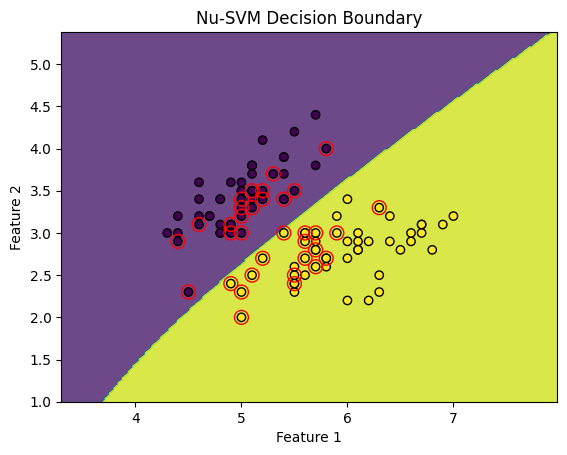

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Get predictions for each point in the mesh grid
Z = nu_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

# Highlight support vectors
plt.scatter(nu_svm.support_vectors_[:, 0], nu_svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='red')

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Nu-SVM Decision Boundary')

# Show the plot
plt.show()

## Novelty and outlier detection

Intro...

This kind of problem can be _unsupervised_, meaning the training usually do not have (or do not care about) the labels. In fact, the primary form of the optimization problem is 
$$\begin{array}{rl} 
\arg\min_{w, b, \xi \ge 0, \rho>0} & \frac{1}{2} \langle w, w \rangle - \rho + \frac{1}{\nu d} \sum_{j=1}^m \xi_j \\ 
\text{subject to} & (\mathbf{w}^\top \mathbf{x}^j + b) \ge \rho - \xi_j \text{ for } j = 1, ..., m
\end{array}$$
and all the $y^j$ are disappeared from the constraints. Furthermore, $d$ is the dimensionality of the feature vectors. 

In the literature, novelty detection and outlier detection as used as synonyms. Sometimes, novelty detection denotes a training process for which we train uniquely on the regular data, while outlier detection is trained on both regular and anomalous data. 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import OneClassSVM

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Select the first two classes, separately
X_1, X_2 = X[:50], X[50:100]
y_1, y_2 = y[:50], y[50:100]

# Create the training set, use only one class
X_train = X_1[:25]
X_test = np.row_stack([X_1[25:50], X_2[:50]])
y_test = np.array([1] * 25 + [-1] * 50)
print(f"{X_train.shape=} {X_test.shape=} {y_test.shape=}")

# Create a One-Class SVM model for outlier detection
one_class_svm = OneClassSVM(nu=0.1)
one_class_svm.fit(X_train)

# 1 = normal data, -1 = anomalies
y_pred = one_class_svm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

X_train.shape=(25, 2) X_test.shape=(75, 2) y_test.shape=(75,)
Accuracy: 96.00%


We can also visualize the result as before. Only one point has been misclassified. 

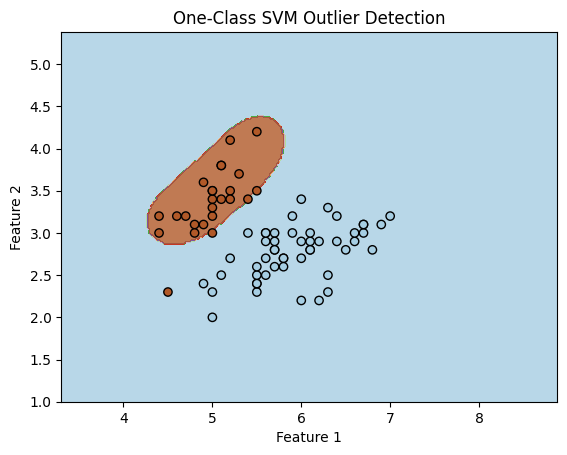

In [43]:
# Create a mesh grid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Get predictions for each point in the mesh grid
Z = one_class_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary with blue and orange colors
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k')

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('One-Class SVM Outlier Detection')

# Show the plot
plt.show()

## References

\[chen05\] Chen and Lin and Schölkopf. (2005). A tutorial on nu‐support vector machines. Applied Stochastic Models in Business and Industry, 21(2), 111-136.